In [1]:
# I N T R O D U C T I O N

# This notebook covers the EDA of inside Airbnb´s data on Stockholm.
# The two teammates also analyze two other European metropoles: Rome and Barcelona.

# Airbnb is a plattform developed out of the couchsurfing movement and is open for commercial use.
# Unfortunately, cities with a very tense housing market experienced a kind of misuse of airbnb:
# Many properties have been bought specifically as short-term-rental investments, managed by agencies that have dozens of such properties.
# The agencies act as broker and charge a commission from each booking. 
# This is critical because
# - The mass subletting of housing at high prices for short stays is putting further pressure on the already tight housing market. 
# - Housing is becoming scarcer, rents are rising.
# - Fewer taxes are being collected through tourism.
# - Municipalities are losing control over the amount of tourism.
# - Residents are annoyed by the many strangers coming in and out of their homes.

# Airbnb does not assume any legal obligations so that some cities issued regulations.

# Nevertheless, some infringements are visible and they are some kind of predictable if there are applicable laws as it is the case in Barcelona.

# Stockholm did not release any regulations yet so that there are no infringements.
# Therefore, this notebook provides

# 1. an EDA, if there are some KPIs that may suggest a danger of missuse in an unregulated environment with no extremely tense housing market
# 2. a short EDA in regards of pricing in Stockholm
# 3. perhaps a model for price prediction based on Stockholm data

# Data used in this project is taken from Inside Airbnb.

In [2]:
# EDA 1
# Hypotheses: when are commercial hosts unhealthy for a public community?

# Hosts with more than (?) properties.
# Hosts with an occupancy rate significantly higher than 30%.
# Hosts on more than two community which means that they manage more than their condo and one vacational place.
# Hosts with less or equal to 3 nights minimum stay.
# Hosts with an amount of reviews far over mean.
# Hosts with an acceptance rate = 100%

# let´s try if it is possible to filter the data after the EDA if the hypotheses remain ok.

# In general, a certain desity of airbnb per area or inhabitants/area may indicate missuse.

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
c = ['#8e9aaf', '#cbc0d3', '#efd3d7', '#dee2ff', '#feeafa']
plt.style.use('default')

In [4]:
# getting a feeling for Stockholm's data

In [33]:
sh = pd.read_csv("../data/listings 2.csv")
sh.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,75590,https://www.airbnb.com/rooms/75590,20221229235426,2022-12-30,city scrape,Amazing nature location by a lake,"Apartment on the top floor, overlooking a lake...","Expect a wonderful stay in beautiful scenery, ...",https://a0.muscache.com/pictures/7430cc80-7a4f...,397766,...,5.00,4.78,4.78,NaN,f,1,1,0,0,0.09
1,164448,https://www.airbnb.com/rooms/164448,20221229235426,2022-12-30,city scrape,Double room in central Stockholm with Wi-Fi,I am renting out a nice double room on the top...,NaN,https://a0.muscache.com/pictures/1101571/13429...,784312,...,4.97,4.83,4.76,NaN,t,2,0,2,0,2.55
2,170651,https://www.airbnb.com/rooms/170651,20221229235426,2022-12-30,city scrape,Petit Charm Rooftop next to heaven,My place is perfect for 1 person or mabey 2 if...,NaN,https://a0.muscache.com/pictures/74dc2c29-1f7a...,814021,...,4.92,4.84,4.74,NaN,f,1,1,0,0,0.30
3,206221,https://www.airbnb.com/rooms/206221,20221229235426,2022-12-30,city scrape,Doubleroom at Södermalm &trendySofo,<b>The space</b><br />The region is situated a...,NaN,https://a0.muscache.com/pictures/1792713/2c120...,1022374,...,4.90,4.94,4.83,NaN,f,1,0,0,1,0.59
4,208366,https://www.airbnb.com/rooms/208366,20221229235426,2022-12-30,city scrape,Central apt. in Sofo .Perfect 4 Families & Kids,<b>The space</b><br />LOCATION:<br />Beautiful...,NaN,https://a0.muscache.com/pictures/5648534/0238f...,993889,...,4.92,4.70,4.49,NaN,f,1,1,0,0,0.32


In [6]:
sh_nb = pd.read_csv("../data/neighbourhoods.csv")
sh_nb.head()

,neighbourhood_group,neighbourhood
0,NaN,Älvsjö
1,NaN,Bromma
2,NaN,Enskede-Årsta-Vantörs
3,NaN,Farsta
4,NaN,Hägersten-Liljeholmens


In [7]:
sh_rev = pd.read_csv("../data/reviews.csv")
sh_rev.head()

,listing_id,date
0,75590,2013-08-02
1,75590,2013-08-09
2,75590,2013-08-16
3,75590,2013-08-19
4,75590,2013-08-28


In [8]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3339 non-null   int64  
 1   listing_url                                   3339 non-null   object 
 2   scrape_id                                     3339 non-null   int64  
 3   last_scraped                                  3339 non-null   object 
 4   source                                        3339 non-null   object 
 5   name                                          3337 non-null   object 
 6   description                                   3234 non-null   object 
 7   neighborhood_overview                         1561 non-null   object 
 8   picture_url                                   3339 non-null   object 
 9   host_id                                       3339 non-null   i

In [9]:
sh1 = sh

In [10]:
sh.shape

(3339, 75)

In [11]:
sh.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.339000e+03,3.339000e+03,3.339000e+03,3339.000000,3339.000000,0.0,3339.000000,3339.000000,3339.000000,0.0,...,2733.000000,2733.000000,2733.000000,2733.000000,0.0,3339.000000,3339.000000,3339.000000,3339.000000,2751.000000
mean,2.042764e+17,2.022123e+13,1.310851e+08,12.949686,33.369572,NaN,59.319302,18.032603,3.279724,NaN,...,4.859104,4.857720,4.793882,4.711965,NaN,4.079365,3.471998,0.431267,0.037436,1.097866
std,3.130319e+17,0.000000e+00,1.445568e+08,107.899485,326.654131,NaN,0.029821,0.063394,1.968349,NaN,...,0.324864,0.323789,0.322909,0.360283,NaN,10.204294,10.122114,1.119437,0.360713,1.428936
min,7.559000e+04,2.022123e+13,4.457000e+03,1.000000,1.000000,NaN,59.231950,17.773110,0.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.180487e+07,2.022123e+13,1.942711e+07,1.000000,1.000000,NaN,59.300990,18.004925,2.000000,NaN,...,4.830000,4.850000,4.710000,4.610000,NaN,1.000000,1.000000,0.000000,0.000000,0.200000
50%,4.205427e+07,2.022123e+13,6.288472e+07,1.000000,2.000000,NaN,59.318020,18.049960,3.000000,NaN,...,4.960000,4.980000,4.890000,4.790000,NaN,1.000000,1.000000,0.000000,0.000000,0.510000
75%,6.080883e+17,2.022123e+13,2.100933e+08,2.000000,4.000000,NaN,59.337804,18.076085,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,2.000000,1.000000,0.000000,0.000000,1.350000
max,7.921731e+17,2.022123e+13,4.929636e+08,1597.000000,5139.000000,NaN,59.418580,18.166070,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,65.000000,65.000000,8.000000,5.000000,17.090000


In [12]:
sh.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [13]:
# many columns without interest: easy cleaning

sh = sh[['id', 'name',
       'description', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate',
       'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'host_identity_verified', 
       'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


<Axes: >

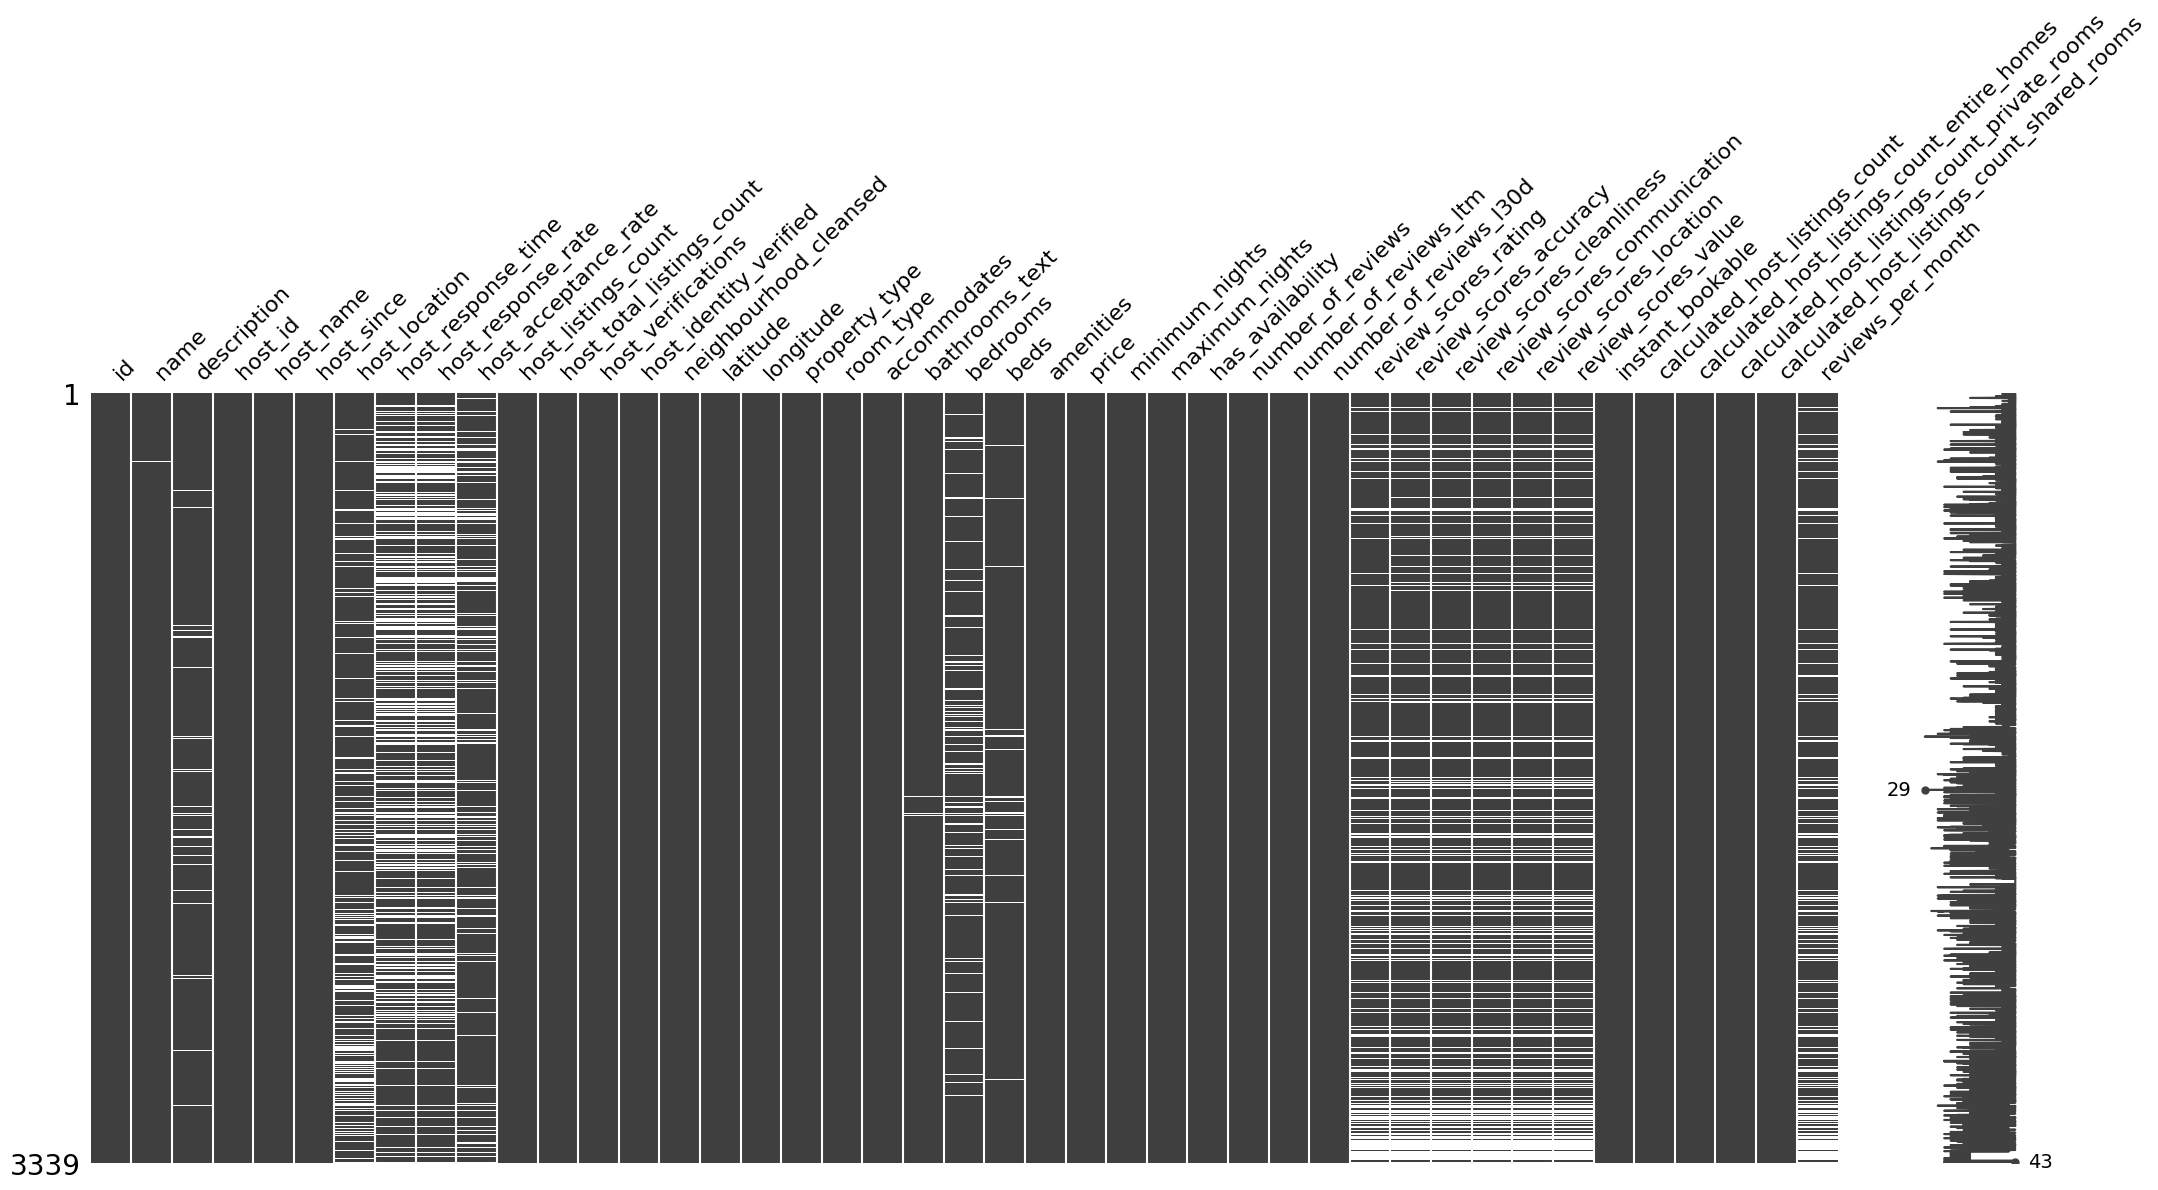

In [14]:
!pip install missingno
import missingno as msno
msno.matrix(sh)

In [15]:
sh.head()

,id,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,75590,Amazing nature location by a lake,"Apartment on the top floor, overlooking a lake...",397766,Peter,2011-02-18,"Stockholm, Sweden",NaN,NaN,0%,...,4.89,5.00,4.78,4.78,f,1,1,0,0,0.09
1,164448,Double room in central Stockholm with Wi-Fi,I am renting out a nice double room on the top...,784312,Li,2011-07-06,"Stockholm, Sweden",within an hour,100%,100%,...,4.81,4.97,4.83,4.76,t,2,0,2,0,2.55
2,170651,Petit Charm Rooftop next to heaven,My place is perfect for 1 person or mabey 2 if...,814021,Marie,2011-07-13,"Stockholm, Sweden",within a few hours,100%,29%,...,4.55,4.92,4.84,4.74,f,1,1,0,0,0.30
3,206221,Doubleroom at Södermalm &trendySofo,<b>The space</b><br />The region is situated a...,1022374,Elisabeth,2011-08-26,Sweden,a few days or more,0%,0%,...,4.83,4.90,4.94,4.83,f,1,0,0,1,0.59
4,208366,Central apt. in Sofo .Perfect 4 Families & Kids,<b>The space</b><br />LOCATION:<br />Beautiful...,993889,Bartholomew Lion,2011-08-19,"Stockholm, Sweden",within an hour,100%,17%,...,4.43,4.92,4.70,4.49,f,1,1,0,0,0.32


In [16]:
sh.isna().sum()
# in a second step, remove columns with no entries = neighbourhood_group_cleansed, bathrooms (!!), and license. 
# Are they all private?
# in a third step, remove columns with more than around 50% missing values 
# like neighborhood_overview, host_about, neighbourhood
# rows removal: later

id                                                 0
name                                               2
description                                      105
host_id                                            0
host_name                                          0
host_since                                         0
host_location                                    592
host_response_time                              1085
host_response_rate                              1085
host_acceptance_rate                             527
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_identity_verified                             0
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                     

In [17]:
# explore Stockholm's airbnb data in general

# distribution of skewness in hosts
# centrality / spread of hosts, prices, room types
# instant bookable / main hosts
# most popular room type
# avg price / room type, neighborhood?
# add column: ratio offers/host
# add column: occupancy rate (days/year/no of frequence of bookings)

# unexpected values?
# missing values?

# ratio hosts/inhabitants of citiy (950.000)

In [18]:
sh1["license"].unique()

array([nan])

In [19]:
# lookup
sh[['id', 'host_id', 'name']].loc[sh['host_id'] == 492963558]

,id,host_id,name
3333,791041859220768353,492963558,Cozy apartment in Stockholm


In [20]:
#1: host listings
sh.host_listings_count

0       1
1       2
2       1
3       1
4       1
       ..
3334    2
3335    1
3336    1
3337    1
3338    5
Name: host_listings_count, Length: 3339, dtype: int64

In [21]:
sh.host_total_listings_count

0       2
1       2
2       1
3       2
4       1
       ..
3334    2
3335    1
3336    1
3337    1
3338    5
Name: host_total_listings_count, Length: 3339, dtype: int64

In [22]:
sh['listings_diff'] = sh.apply(lambda row: row.host_total_listings_count - row.host_listings_count, axis=1)
sh.listings_diff.value_counts(bins = 3)

/var/folders/vd/9315q_t551sdxxzmd737zk9c0000gn/T/ipykernel_27296/1893706949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sh['listings_diff'] = sh.apply(lambda row: row.host_total_listings_count - row.host_listings_count, axis=1)


listings_diff
(-3.5429999999999997, 1180.667]    3326
(2361.333, 3542.0]                   13
(1180.667, 2361.333]                  0
Name: count, dtype: int64

In [23]:
sh.listings_diff.unique()

array([   1,    0,    2,    4,    3,   21,    7,    5,    6,   28,   10,
        103,  115,   89,   15,   97,   71,   11,   19,  112,   13,   25,
       3542,   16,  807,    8,   14])

In [24]:
sh.listings_diff.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3339 entries, 0 to 3338
Series name: listings_diff
Non-Null Count  Dtype
--------------  -----
3339 non-null   int64
dtypes: int64(1)
memory usage: 26.2 KB


In [25]:
sh[sh.listings_diff >= 2].shape

(733, 44)

In [26]:
sh.host_listings_count.value_counts(sort=True, bins = 10)

host_listings_count
(-0.597, 160.6]     3318
(1437.4, 1597.0]      13
(320.2, 479.8]         5
(1277.8, 1437.4]       3
(160.6, 320.2]         0
(479.8, 639.4]         0
(639.4, 799.0]         0
(799.0, 958.6]         0
(958.6, 1118.2]        0
(1118.2, 1277.8]       0
Name: count, dtype: int64

In [27]:
sh[sh.host_listings_count >= 3].shape

(721, 44)

In [28]:
#2: share room type

<Axes: xlabel='room_type', ylabel='count'>

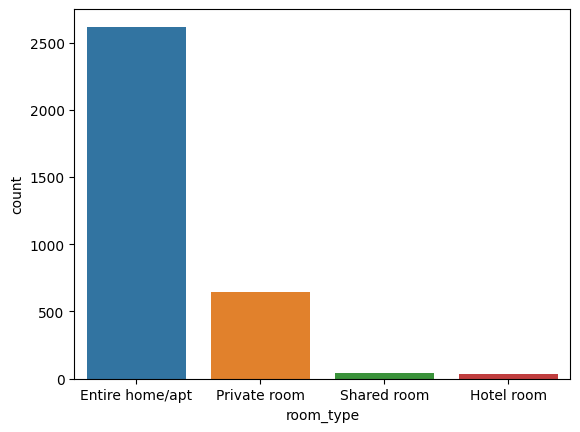

In [29]:
sns.countplot(x="room_type", data = sh)

In [30]:
sh.room_type.value_counts()

room_type
Entire home/apt    2618
Private room        646
Shared room          40
Hotel room           35
Name: count, dtype: int64

In [34]:
sh['price'].astype(float)
sh.price.info()

ValueError: could not convert string to float: '$949.00'

In [ ]:
sh.price.head(10)

In [ ]:
sh.price.value_counts()

In [ ]:
sh.price.describe()

In [ ]:
def pct99(column):
    return column.quantile(0.99)
sh.price.agg(pct99)

In [ ]:
expensive = sh.sort_values('price').tail(35)
print(expensive.price)

In [ ]:
sh.property_type.unique()

In [ ]:
wanted = ['Private room in bed and breakfast', 'Entire serviced apartment', 'Shared room in hostel', 'Room in hotel', 'Room in boutique hotel', 'Room in serviced apartment', 'Private room in hostel', 'Room in hostel', 'Room in aparthotel', 'Shared room in bed and breakfast', 'Shared room in bed and breakfast']
sh_wanted = sh[sh["property_type"].isin(wanted)]
sh_wanted.shape

In [ ]:
sh_wanted[sh_wanted.listings_diff >= 2].shape

In [ ]:
sh.bedrooms.unique()

In [ ]:
sh.beds.unique()

In [ ]:
minu = sh.minimum_nights.unique()
print(sorted(minu))

In [ ]:
sh[sh.minimum_nights >= 4].shape

In [ ]:
sh_nc = sh.neighbourhood_cleansed.unique()
print(sorted(sh_nc))

In [ ]:
sns.countplot(x='neighbourhood_cleansed', data = sh)
plt.xticks(rotation = 90)

In [ ]:
sh["has_availability"].value_counts()

In [ ]:
sh1["availability_30"].describe()

In [ ]:
sh1.availability_30.value_counts(ascending = True, bins = 6)

In [ ]:
sh1["availability_60"].describe()

In [ ]:
sh1.availability_60.value_counts(ascending = True, bins = 6)

In [ ]:
sh1["availability_90"].describe()

In [ ]:
sh1.availability_90.value_counts(ascending = True, bins = 6)

In [ ]:
sh1["availability_365"].describe()

In [ ]:
sh1.availability_365.value_counts(ascending = True, bins = 6)

In [ ]:
a30 = [1785, 294, 200, 186, 266, 608]
a60 = [1684, 223, 289, 200, 200, 743]
a90 = [1609, 227, 199, 278, 224, 802]
a365 = [1511, 382, 309, 197, 221, 719]

df = pd.DataFrame(data=[a30, a60, a90, a365])
df.columns = ["bin1", "bin2", "bin3", "bin4", "bin5", "bin6"]
print(df)

In [ ]:
pd.DataFrame(df.values.T).plot()

In [ ]:
sh["instant_bookable"].value_counts()

In [ ]:
sh[sh.instant_bookable == 1].isin(["wanted"])


In [ ]:
sh[sh.host_listings_count >= 4].isin(["wanted"])

In [ ]:
sh.number_of_reviews.sum()

In [ ]:
sh.number_of_reviews_ltm.sum()

In [ ]:
sh.number_of_reviews_l30d.sum()

In [ ]:
sh.review_scores_rating.describe()

In [ ]:
sh.review_scores_accuracy.describe()

In [ ]:
sh.review_scores_cleanliness.describe()

In [ ]:
sh.review_scores_communication.describe()

In [ ]:
sh.review_scores_location.describe()

In [ ]:
sh.review_scores_value.describe()

In [ ]:
# data cleaning:
# - 2 rows without "name"
# - slicing the outliers in price

In [ ]:
sh = sh[sh['name'].notna()]

In [ ]:
sh.isna().sum()

In [ ]:
expensive = sh.sort_values('price').tail(35)

In [ ]:
sh_price = sh.loc[(sh['price'] <= 6500)]
sh_price.shape

In [ ]:
# price differences between 3 accomodation categories

In [ ]:
sh.groupby("calculated_host_listings_count_entire_homes")["price"].mean().mean()

In [ ]:
sh.groupby("calculated_host_listings_count_private_rooms")["price"].mean().mean()

In [ ]:
sh.groupby("calculated_host_listings_count_shared_rooms")["price"].mean().mean()

In [ ]:
# CHECK for RELATIONSHIPS

# hosts with extraordinary multiple listings
# frequence of bookings
# occupancy
# add column: occupancy rate (days/year/no of frequence of bookings?

In [ ]:
sh.host_response_time = sh.host_response_time.fillna("no_info")
cat_order = ["within an hour", "within a few hours", "within a day", "a few days or more", "no_info"]
sns.countplot(x="host_response_time", data = sh, order = cat_order)
plt.xticks(rotation = 90)

In [ ]:
# Listings & Einwohner je Vorort (2014)
#Södermalms                960 / 126.736
#Norrmalms                 359 / 69.592
#Kungsholmens              343 / 68.016
#Hägersten-Liljeholmens    311 / 83.283
#Enskede-Årsta-Vantörs     281 / 96.916
#Östermalms                231 / 61.000
#Bromma                    188 / 72.000
#Skarpnäcks                174 / 45.340
#Hässelby-Vällingby        120 / 71.042
#Älvsjö                    107 / 27.500
#Farsta                    103 / 55.300
#Rinkeby-Tensta             71 / 46.000
#Spånga-Tensta              50 / 38.082
#Skärholmens                41 / 31.000

In [ ]:
a = 126.736/960
b = 69.592/359
c = 68.016/343
d = 83.283/311
e = 96.916/281
f = 61.000/231
g = 72.000/188 
i = 45.340/174
j = 71.042/120
k = 27.500/107
l = 55.300/103
m = 46.000/71
n = 38.082/50
o = 31.000/41
print(a, b, c, d, e, f, g, i, j, k, l, m, n, o) 

In [ ]:
sh1.availability_365.value_counts()

In [ ]:
sh_check = sh1[["host_response_rate","host_acceptance_rate", "availability_90", "number_of_reviews_ltm", "instant_bookable", "host_response_time"]]
sh_check

In [ ]:
sh_check.info()

In [ ]:
sh.host_response_rate = sh.host_response_rate.str.replace('%', '')
sh.host_response_rate = sh.host_response_rate.astype(float)
sh.host_response_rate.value_counts().sort_values()

In [ ]:
sh.host_response_rate.isna().sum()

In [ ]:
sh.host_response_rate.info()

In [ ]:
sh.host_response_time.value_counts()

In [ ]:
sh.host_response_time.isna().sum()

In [ ]:
sh.host_acceptance_rate = sh.host_acceptance_rate.str.replace('%', '')
sh.host_acceptance_rate.value_counts().sort_index()

In [ ]:
sh.host_acceptance_rate.isna().sum()

In [ ]:
sh.host_acceptance_rate.astype(float).describe()

In [ ]:
sh1.availability_90.value_counts().sort_index()

In [ ]:
sh = sh1.assign(availability_90_ratio=lambda x: x["availability_90"] / 90)
sh.availability_90_ratio.describe()


In [ ]:
sh[sh["availability_90_ratio"] < 0.7]

In [ ]:
sh.number_of_reviews_ltm.describe()

In [ ]:
sh.number_of_reviews_ltm.value_counts(normalize = True)

In [ ]:
sh[sh["number_of_reviews_ltm"] > 15]

In [ ]:
sh.host_listings_count.describe()

In [ ]:
sh.host_total_listings_count.describe()

In [ ]:
sh.property_type.value_counts()

In [ ]:
sh['instant_bookable'] = np.where(sh['instant_bookable'] == "t", 1, sh['instant_bookable'])
sh['instant_bookable'] = np.where(sh['instant_bookable'] == "f", 0, sh['instant_bookable'])
sh['instant_bookable'] = sh.instant_bookable.astype(float)

In [ ]:
sh.instant_bookable.info()

In [ ]:
sh.minimum_nights.value_counts()

In [ ]:
sh_check = sh[['host_response_rate', 'host_response_time', 'host_acceptance_rate', 'availability_90', 'host_listings_count', 'host_total_listings_count', 'number_of_reviews_ltm', 'instant_bookable', 'minimum_nights']]
sh_check

In [ ]:
sh_check.info()

In [ ]:
# price differences between 3 accomodation categories, neighborhoods
# are no of recommendations, recommendaton rate, Antwortzeit and level of Ausstattung correlated to the pricing as third factor?
# most popular room type is the entire_home type with 85.11%.

# price 

# other ideas
# avg booking periods

In [ ]:
sh["bathrooms_text"].value_counts()

In [ ]:
sh["bathrooms_text"].isnull().sum()